# All the imports required to run the files given below

In [ ]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import csv
import numpy
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import statistics
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, classification_report
import pickle

# Selective Features extraction code using librosa and making a final dataset

In [ ]:
arr = []
FRAME_Length=1024
HOP_Length=512
n_fft=1024
hop_length=512

directory = 'C:/Users/Jasdeep Singh/Downloads/ML_music_doc/'
arr2 = []
var = 0

def add_to_array(array, feature):
    if(len(feature)==1):
        array.append(np.mean(feature))
    else:
        array.append(np.mean(feature))
        array.append(np.var(feature))

dataframe = pd.DataFrame(columns = range(43))
dataframe.columns = ['genre','file_name','rms_mean','rms_var', 'chroma_stft_mean', 'chroma_stft_var', 
                     'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth', 'spectral_bandwidth',
                     'spectral_rolloff', 'spectral_rolloff', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 
                     'tempo_mean', 'spectral_contrast_mean', 'spectral_contrast_var', 'spectral_flatness_mean',
                     'spectral_flatness_var', 'flux_mean', 'flux_var', 'harmony_mean', 'harmony_var', 'mel_spec1', 
                     'mel_spec2', 'mel_spec3', 'mel_spec4', 'mel_spec5', 'mel_spec6', 'mel_spec7', 'mel_spec8', 'mel_spec9',
                     'mel_spec10', 'mel_spec11', 'mel_spec12', 'mel_spec13', 'mel_spec14', 'mel_spec15', 'mel_spec16', 
                     'mel_spec17', 'mel_spec18', 'mel_spec19', 'mel_spec20']

print(dataframe)
for filename in os.listdir(directory):
#     if(var==1):
#         continue
#     var = 1
    f = os.path.join(directory, filename)
    for filename2 in os.listdir(f):
        f2 = os.path.join(f, filename2)
        audio_data, sampling_rate = librosa.load(f2)
        
        ith_value = []
        ith_value.append(filename)
        ith_value.append(filename2)
        
        # storing mean and variance of RMSE values
        rmse = librosa.feature.rms(audio_data,frame_length=FRAME_Length,hop_length=HOP_Length)[0]
        add_to_array(ith_value, rmse);
        
        # storing mean and variance of chroma_stft values
        chroma_stft=librosa.feature.chroma_stft(audio_data, sr=sampling_rate, n_fft=n_fft, hop_length=hop_length).ravel()
        add_to_array(ith_value, chroma_stft);
        
        # storing mean and variance of spectral_centroid values
        spectral_centroid=librosa.feature.spectral_centroid(audio_data, sr=sampling_rate, n_fft=n_fft, hop_length=hop_length).ravel()
        add_to_array(ith_value, spectral_centroid);
        
        # storing mean and variance of spectral_bandwidth values
        spectral_bandwidth=librosa.feature.spectral_bandwidth(audio_data, sr=sampling_rate, n_fft=n_fft, hop_length=hop_length).ravel()
        add_to_array(ith_value, spectral_bandwidth);
        
        # storing mean and variance of spectral_rolloff values
        spectral_rolloff=librosa.feature.spectral_rolloff(audio_data, sr=sampling_rate, n_fft=n_fft, hop_length=hop_length).ravel()
        add_to_array(ith_value, spectral_rolloff);
        
        # storing mean and variance of zero_crossing_rate values
        zero_crossing_rate=librosa.feature.zero_crossing_rate(audio_data, frame_length=n_fft, hop_length=hop_length).ravel()
        add_to_array(ith_value, zero_crossing_rate);
        
        # storing mean and variance of tempo values
        tempo=librosa.beat.tempo(audio_data,sr=sampling_rate,hop_length=hop_length)
        add_to_array(ith_value, tempo);
        
        # storing mean and variance of spectral_contrast values
        spectral_contrast=librosa.feature.spectral_contrast(audio_data, sr=sampling_rate, n_fft=n_fft, hop_length=hop_length).ravel()
        add_to_array(ith_value, spectral_contrast);
        
        # storing mean and variance of spectral_flatness values
        spectral_flatness=librosa.feature.spectral_flatness(audio_data, n_fft=n_fft, hop_length=hop_length).ravel()
        add_to_array(ith_value, spectral_flatness);
        
        # storing mean and variance of flux values
        flux=librosa.onset.onset_strength(audio_data,sr=sampling_rate).ravel()
        add_to_array(ith_value, flux);
        
        # storing mean and variance of harmony values
        harmony=librosa.effects.harmonic(audio_data).ravel()
        add_to_array(ith_value, harmony);
        
        # storing mean of 20 mels while extracting mel_spectrogram feature
        mel_spectrogram = librosa.feature.melspectrogram(audio_data, n_fft=n_fft, hop_length=hop_length, n_mels=20)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
        for i in log_mel_spectrogram:
            ith_value.append(statistics.mean(i))
            
        dataframe.loc[len(dataframe.index)] =  ith_value
        log_mel_spectrogram
        
dataframe 
dataframe.to_csv('rms_mel.csv', index = False)

# Loading the saved dataset

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv (r'rms_mel.csv')
df

genre        file_name  rms_mean   rms_var  chroma_stft_mean  \
0     blues  blues.00000.wav  0.127820  0.003445          0.409089   
1     blues  blues.00001.wav  0.093903  0.002756          0.438725   
2     blues  blues.00002.wav  0.173220  0.003548          0.420921   
3     blues  blues.00003.wav  0.138990  0.006927          0.547953   
4     blues  blues.00004.wav  0.089781  0.002618          0.334440   
...     ...              ...       ...       ...               ...   
1195   rock   rock.00095.wav  0.079147  0.000395          0.451571   
1196   rock   rock.00096.wav  0.076000  0.000656          0.504338   
1197   rock   rock.00097.wav  0.081143  0.000399          0.500144   
1198   rock   rock.00098.wav  0.083426  0.001275          0.498808   
1199   rock   rock.00099.wav  0.054290  0.000353          0.462077   

      chroma_stft_var  spectral_centroid_mean  spectral_centroid_var  \
0            0.089115             1727.351474            142000.2248   
1            0.092898             1450.864079            378294.2410   
2            0.084918             1493.930518            175858.1350   
3            0.071065              996.820708            183117.4562   
4            0.087125             1749.111185            359184.3256   
...               ...                     ...                    ...   
1195         0.073594             1892.933025            291285.5685   
1196         0.066288             1920.394382            188219.5076   
1197         0.068688             2016.695292            234634.6772   
1198         0.082386             1314.906896            245576.5417   
1199         0.072335             1505.404015            416104.2825   

      spectral_bandwidth_mean  spectral_bandwidth_var  ...  mel_spec11  \
0                 1965.724086             91115.76324  ...  -11.619318   
1                 1972.260927            228136.75110  ...  -23.548323   
2                 1698.946080             94216.07161  ...   -9.212287   
3                 1524.151953            177087.69630  ...  -23.135990   
4                 1699.714246            105136.44800  ...  -16.692339   
...                       ...                     ...  ...         ...   
1195              2049.121328            104547.94270  ...  -14.921132   
1196              2020.888552             91559.97027  ...  -13.106709   
1197              1899.241053             78277.99965  ...  -10.310806   
1198              1750.534091            119777.64510  ...  -20.962389   
1199              1727.081876            140944.28010  ...  -21.866735   

      mel_spec12  mel_spec13  mel_spec14  mel_spec15  mel_spec16  mel_spec17  \
0     -13.248830  -15.205503  -17.721975  -21.459818  -23.451105  -25.575070   
1     -24.655277  -26.339476  -28.471700  -33.291893  -33.236996  -32.744590   
2     -13.057380  -16.085901  -16.665873  -19.833254  -22.363142  -24.911274   
3     -25.736160  -29.430140  -30.392696  -32.626990  -35.162300  -36.888172   
4     -18.763874  -21.235283  -20.536680  -22.504978  -25.444075  -28.113205   
...          ...         ...         ...         ...         ...         ...   
1195  -14.130657  -15.188020  -18.477924  -21.123915  -25.875294  -27.437235   
1196  -12.418111  -15.932714  -20.049890  -21.466902  -25.008043  -27.465754   
1197  -10.224064  -12.311652  -16.118890  -17.036240  -22.465780  -25.731897   
1198  -21.496973  -24.258274  -27.915857  -29.797253  -34.093180  -36.866890   
1199  -22.521576  -23.340742  -27.056786  -29.555046  -32.354130  -36.357815   

      mel_spec18  mel_spec19  mel_spec20  
0     -26.389164  -29.996510  -38.826023  
1     -32.470802  -35.806477  -44.577250  
2     -27.586584  -31.426540  -40.359447  
3     -38.613697  -41.235264  -48.588070  
4     -32.240480  -38.584164  -48.707350  
...          ...         ...         ...  
1195  -29.186508  -31.607060  -40.407710  
1196  -28.046460  -31.713278  -40.334846  
1197  -28.891651  -32.660553  -39.990870  
1198  -37.527027  -4

# EDA Applied

In [ ]:
df.describe(include='all')

genre        file_name     rms_mean      rms_var  chroma_stft_mean  \
count    1200             1200  1200.000000  1200.000000       1200.000000   
unique     12             1200          NaN          NaN               NaN   
top     k-pop  blues.00000.wav          NaN          NaN               NaN   
freq      101                1          NaN          NaN               NaN   
mean      NaN              NaN     0.150217     0.005194          0.459706   
std       NaN              NaN     0.081251     0.005868          0.090124   
min       NaN              NaN     0.005260     0.000005          0.211254   
25%       NaN              NaN     0.092129     0.001346          0.397940   
50%       NaN              NaN     0.135429     0.002824          0.464279   
75%       NaN              NaN     0.203522     0.007053          0.517896   
max       NaN              NaN     0.450682     0.047339          0.766724   

        chroma_stft_var  spectral_centroid_mean  spectral_centroid_var  \
count       1200.000000             1200.000000           1.200000e+03   
unique              NaN                     NaN                    NaN   
top                 NaN                     NaN                    NaN   
freq                NaN                     NaN                    NaN   
mean           0.084172             2114.988275           5.538809e+05   
std            0.011587              686.475256           4.471434e+05   
min            0.031543              534.211575           5.487383e+03   
25%            0.077774             1579.486757           2.231561e+05   
50%            0.085561             2146.022251           4.296854e+05   
75%            0.091555             2624.990740           7.510798e+05   
max            0.117582             4172.053412           3.688610e+06   

        spectral_bandwidth_mean  spectral_bandwidth_var  ...   mel_spec11  \
count               1200.000000            1.200000e+03  ...  1200.000000   
unique                      NaN                     NaN  ...          NaN   
top                         NaN                     NaN  ...          NaN   
freq                        NaN                     NaN  ...          NaN   
mean                2224.477244            1.782900e+05  ...   -14.752890   
std                  518.873774            1.373639e+05  ...     8.632911   
min                  865.638667            1.449886e+04  ...   -54.349320   
25%                 1891.488874            8.238163e+04  ...   -19.909779   
50%                 2220.941637            1.430863e+05  ...   -13.265867   
75%                 2594.564123            2.327887e+05  ...    -8.568680   
max                 3477.121297            1.028816e+06  ...     3.911429   

         mel_spec12   mel_spec13   mel_spec14   mel_spec15   mel_spec16  \
count   1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     -15.852278   -17.349627   -18.752165   -21.018702   -23.580673   
std        9.070026     9.453388     9.874122    10.384732    10.900503   
min      -57.569280   -61.139320   -64.242035   -67.354470   -70.672485   
25%      -20.924255   -22.728585   -24.136768   -27.008009   -29.959329   
50%      -14.076291   -15.435189   -16.653697   -18.637833   -21.276772   
75%       -9.508255   -10.569458   -11.571745   -13.579276   -15.751538   
max        4.478398     2.602119     0.421829    -0.364918    -1.211738   

         mel_spec17   mel_spec18   mel_spec19   mel_spec20  
count   1200.000000  1200.000000  1200.000000  1200.000000  
unique          NaN          NaN          NaN          NaN  
top             NaN          NaN          NaN          NaN  
freq            NaN          NaN          NaN          NaN  
mean     -25.543573   -27.290133   -29.628697   -34

In [ ]:
df.isnull().sum()

genre                      0
file_name                  0
rms_mean                   0
rms_var                    0
chroma_stft_mean           0
chroma_stft_var            0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
spectral_rolloff_mean      0
spectral_rolloff_var       0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
tempo_mean                 0
spectral_contrast_mean     0
spectral_contrast_var      0
spectral_flatness_mean     0
spectral_flatness_var      0
flux_mean                  0
flux_var                   0
harmony_mean               0
harmony_var                0
mel_spec1                  0
mel_spec2                  0
mel_spec3                  0
mel_spec4                  0
mel_spec5                  0
mel_spec6                  0
mel_spec7                  0
mel_spec8                  0
mel_spec9                  0
mel_spec10                 0
mel_spec11                 0
mel_spec12    

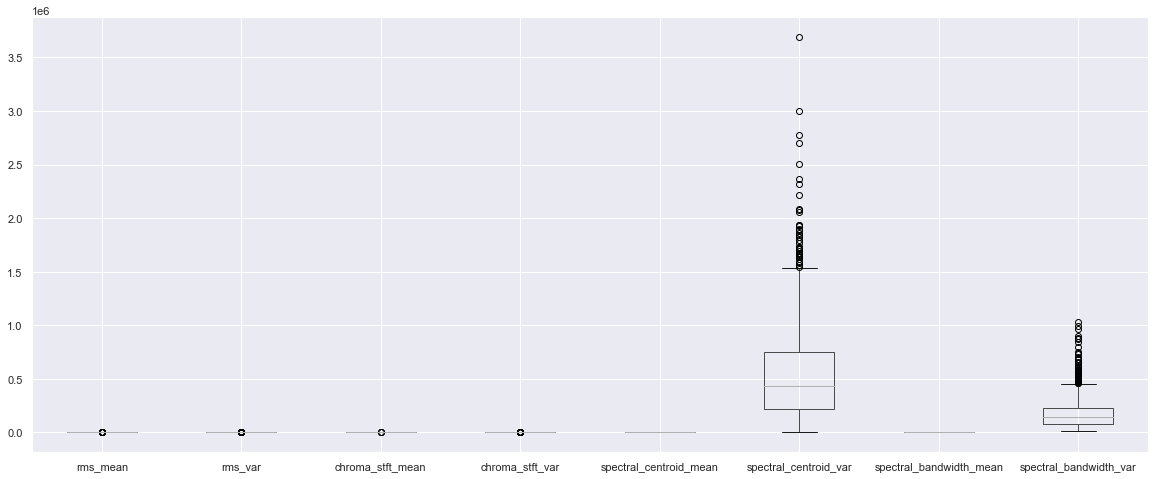

In [ ]:
df2 = df.iloc[:,:10]
df2.boxplot(figsize=(20,8))
plt.savefig('Box_plot_for_10_columns.png', dpi=400)

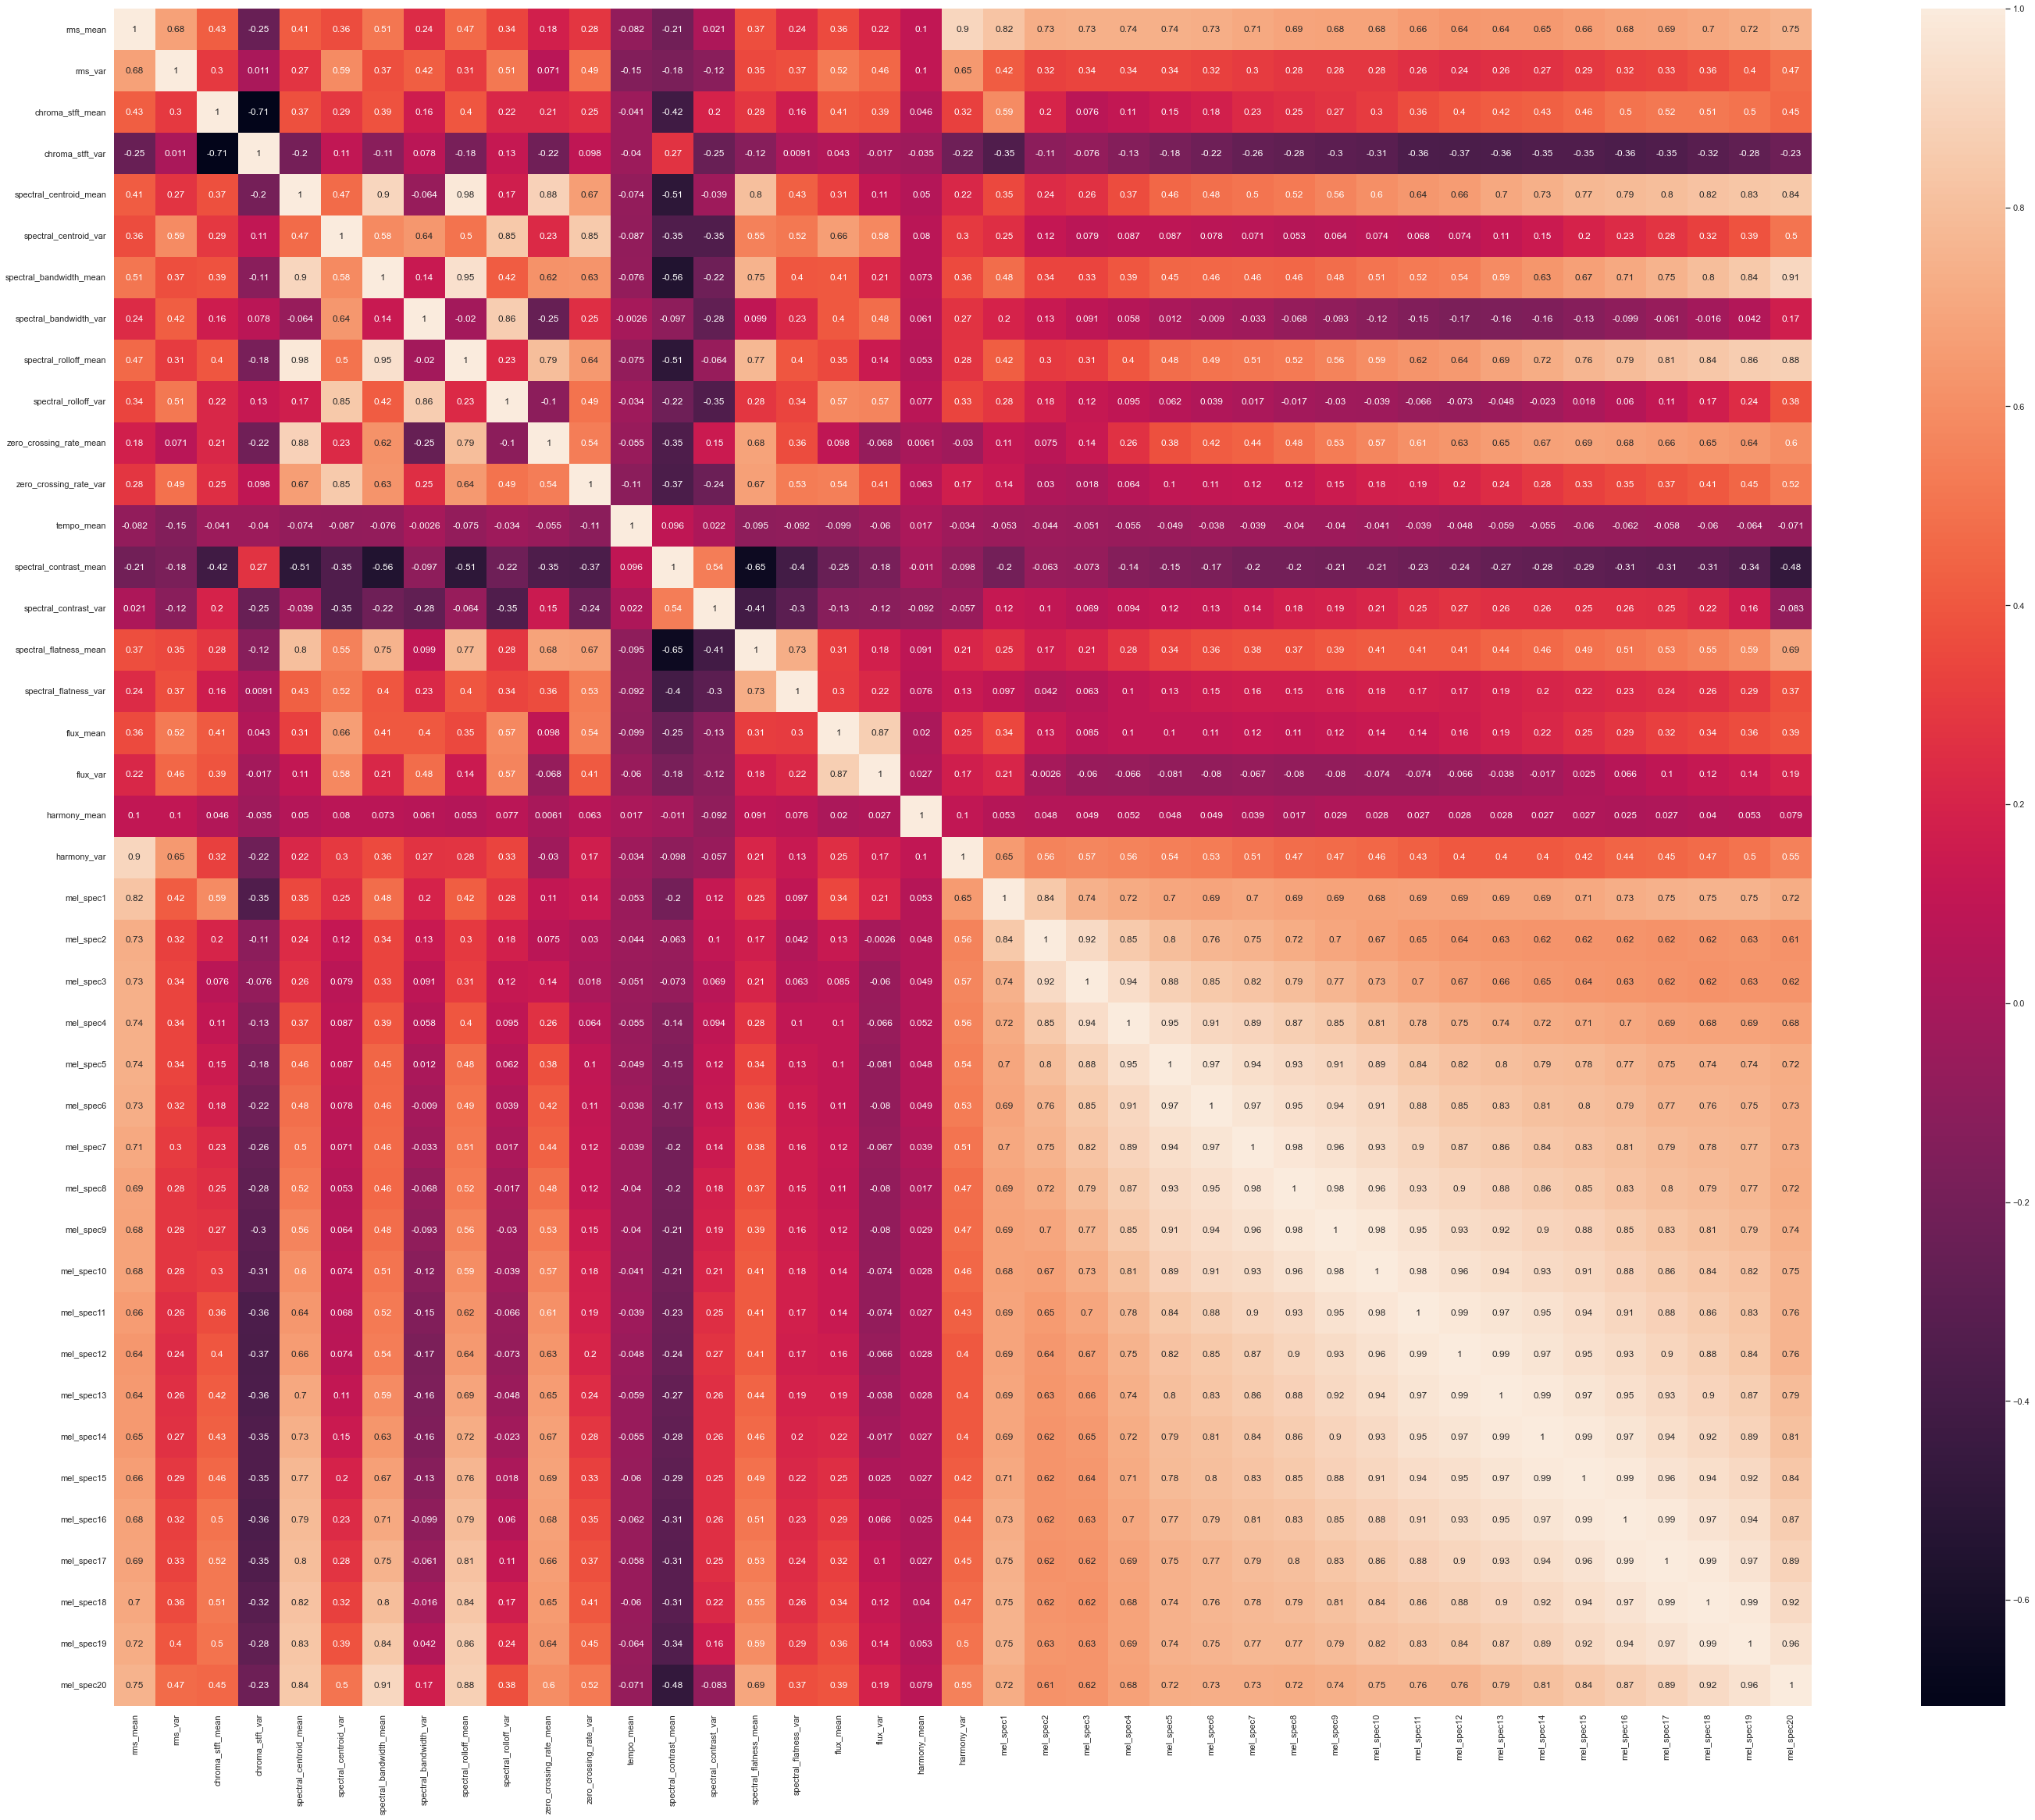

In [ ]:
corr = df.corr()
sns.set(rc={'figure.figsize':(50,40)})
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.savefig('sns_heat_map.png', dpi=400)
plt.show()

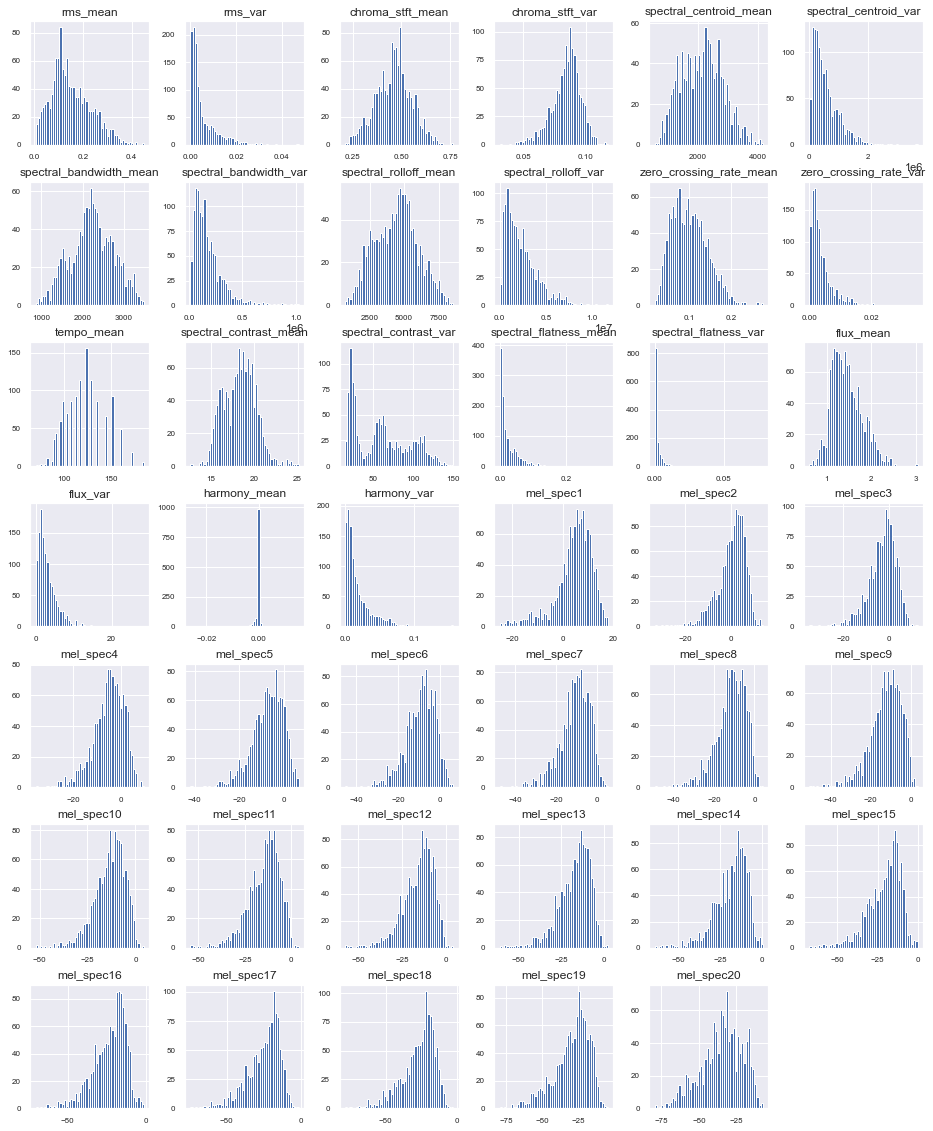

In [ ]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.savefig('Histogram_plot_for_all_columns.png', dpi=400)

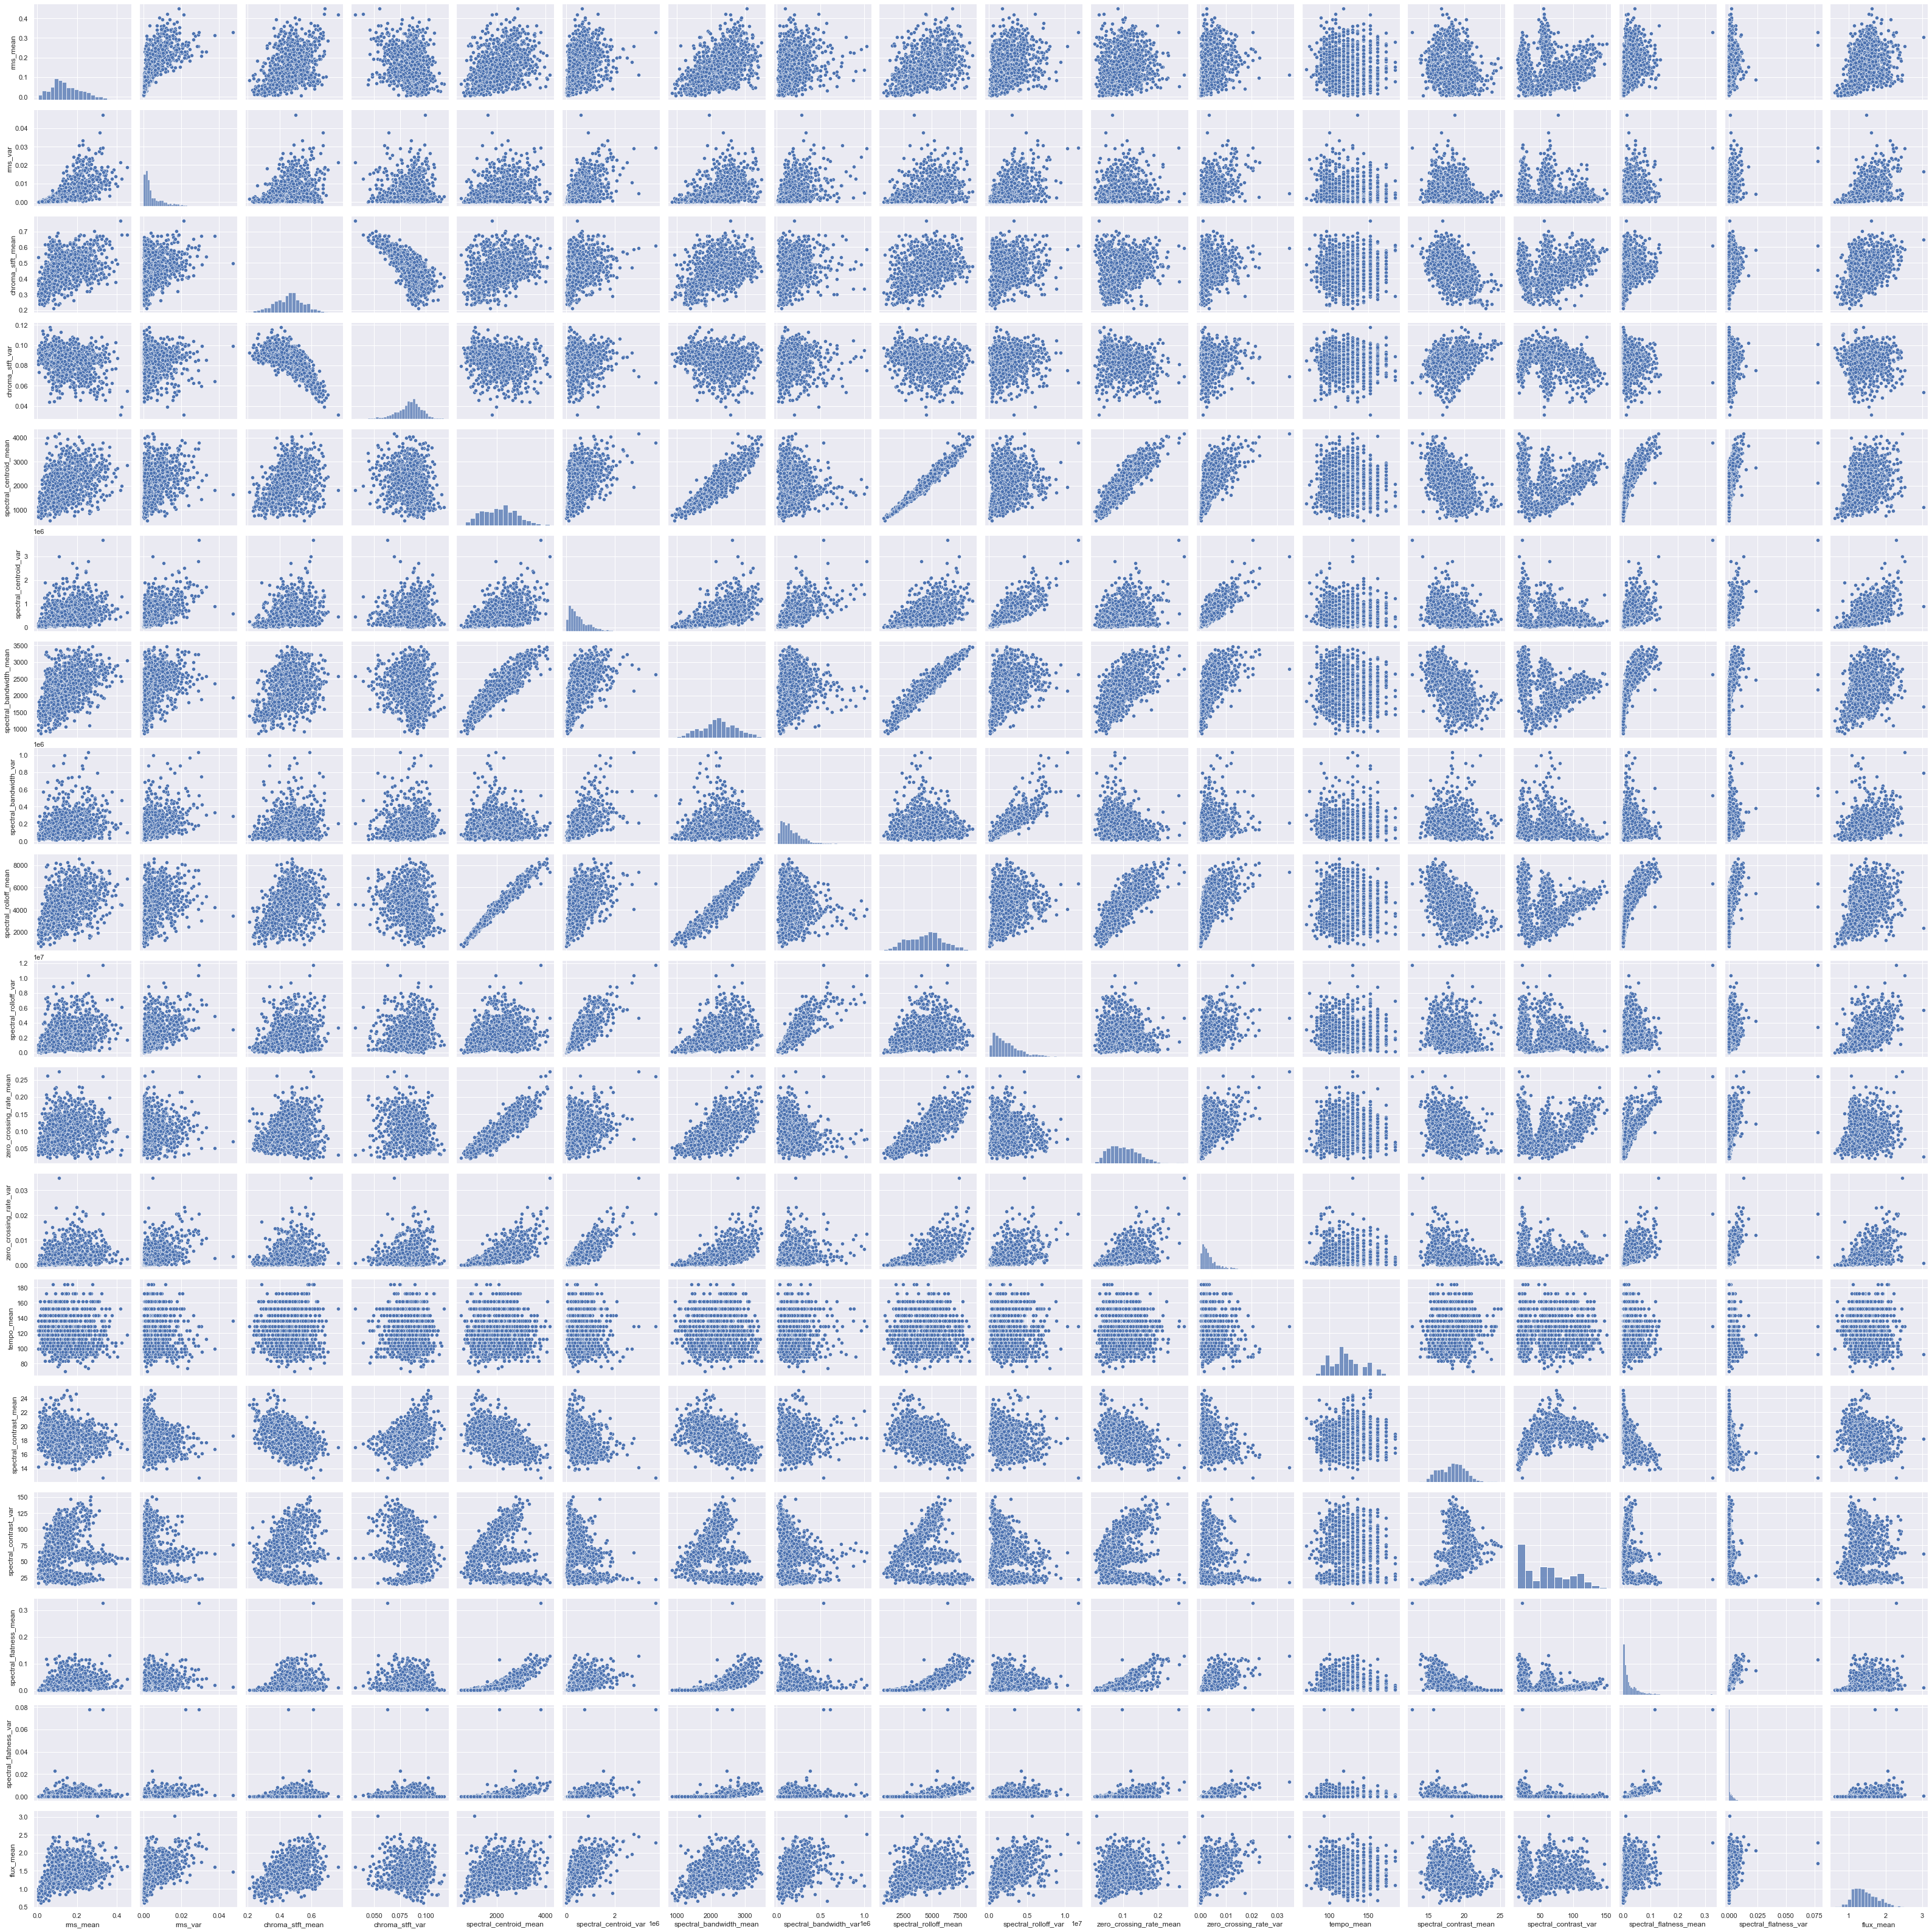

In [ ]:
df2 = df.iloc[:,:20]
sns.pairplot(df2,diag_kind="hist")
plt.savefig('sns_pairplot_columns.png', dpi=400)

In [ ]:
df2 = df.iloc[:,:15]
df2.groupby('genre').mean().T.plot(figsize=(20,10))
plt.savefig('line_plot.png', dpi=400)

# Dividing the dataset into X and Y

In [ ]:
from sklearn.utils import shuffle
import pandas as pd
import numpy as np

df = pd.read_csv (r'rms_mel.csv')
df = shuffle(df)


X_music_file = df.loc[:, df.columns != "genre"]
X = X_music_file.loc[:, X_music_file.columns != "file_name"]
y = df.loc[:, df.columns == "genre"]
# knnreg.tune(y, X, A = 5, res = "spher", estim = "arithmetic")
print(X_music_file)
print(X)
print(y)

                                       file_name  rms_mean   rms_var  \
304                              disco.00004.wav  0.110812  0.004049   
812                              metal.00012.wav  0.113849  0.000195   
757                                03. Crush.wav  0.292776  0.013735   
693                               jazz.00094.wav  0.039236  0.000452   
210                            country.00010.wav  0.074238  0.001185   
...                                          ...       ...       ...   
464   pharoah-tatami-main-version-01-48-2979.wav  0.328095  0.047339   
1180                              rock.00080.wav  0.103514  0.001053   
383                              disco.00083.wav  0.084961  0.001538   
794                                    MONEY.wav  0.110692  0.007166   
384                              disco.00084.wav  0.057962  0.002803   

      chroma_stft_mean  chroma_stft_var  spectral_centroid_mean  \
304           0.414730         0.089924             3235.388128   
8

In [ ]:
scaled_df = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=1)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_train)
print("accuracy", accuracy_score(y_train.values.ravel(), y_pred))

fileName="KNN_base.pkl"
pickle.dump(knn,open(fileName, "wb"))

accuracy 0.49166666666666664


# Applying preprocessing using Truncated SVD, StandardScaler and SelectKBest

In [ ]:
svd = TruncatedSVD(n_components = 30, random_state = 0)
X = svd.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

sel_f = SelectKBest(f_classif, k=25)    # select 30 features
X = sel_f.fit_transform(X, y.values.ravel()) #selecting best 30 features

scaled_df = pd.DataFrame(X)

prediction_dataset = scaled_df.copy(deep=True)
prediction_dataset['file_name'] = df.loc[:, df.columns == "file_name"]
prediction_dataset['genre'] = df.loc[:, df.columns == "genre"]
scaled_df.head()
# from sklearn.decomposition import PCA
# pca_breast = PCA(n_components=5)
# pca_df = pca_breast.fit_transform(scaled_df)
# scaled_df = pd.DataFrame(data = pca_df , columns = ['p1', 'p2', 'p3', 'p4', 'p5'])
# scaled_df.head()

0         1         2         3         4         5         6   \
0 -0.065805  0.574127 -0.057261 -0.933771 -1.203838 -0.727852  1.234124   
1 -1.114632 -0.056856 -0.104096 -1.537771 -1.381022  2.456842 -0.334149   
2 -0.070897  1.109656 -0.417107 -0.223558 -0.154536 -0.486368  0.359269   
3 -0.368645 -0.860274  0.897439  0.391192  1.268446  0.177137 -0.170495   
4 -0.082678  0.180078 -0.131121  0.374784  1.430868  0.017857  0.964344   

         7         8         9   ...        15        16        17        18  \
0  1.496234 -0.072546 -0.124361  ...  0.181265 -1.300212 -0.188661 -0.108662   
1 -0.142993 -0.320526  1.039626  ... -0.262074 -0.036483 -0.280587 -0.644849   
2 -0.995432  0.329169 -0.592841  ...  0.930752 -0.159770  0.869468  0.598809   
3  1.264100 -0.633566  0.462180  ...  1.429942 -0.578689  0.575440  0.768589   
4  0.091426  0.295209  0.490306  ...  0.088678 -0.223943 -0.368105 -0.345581   

         19        20        21        22        23        24  
0 -0.201913 -0.682163 -0.150313  0.079894  0.182292  0.092655  
1 -0.014473  0.370960  0.359510  0.320217 -0.906512  1.134480  
2  0.156396 -0.558183  0.611684  1.181390  1.046804  0.321677  
3 -0.192284  1.707234  1.626651 -0.318136 -1.274655 -0.400735  
4 -0.187586  0.111062  0.078744 -0.512748  1.931161 -0.209353  

[5 rows x 25 columns]

# Methods for Visual Representation of the data 

In [ ]:
def model_assess(model, title = "Default"):
    y_pred = model.predict(X_test)
    print(title, ':')
    # # predict classes on testing data
    cm = confusion_matrix(y_test, y_pred)

    # # plotting conf matrix using seaborn
    plt.figure(figsize = (10,7))
    mask = np.triu(np.ones_like(cm, dtype=np.bool))
    sns.heatmap(cm, mask=mask, vmax=30, center=0,annot=True)
    # plt.savefig("")
    plt.savefig(title+'.png', dpi=400)

    # Predict accuracy,precision_score,recall_score
    print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
    print(f"Overall Precision: {precision_score(y_test, y_pred,average='macro')}")
    print(f"Overall Recall:{recall_score(y_test, y_pred,average='macro')}")
    # Print classification Report
    print(classification_report(y_test, y_pred))

# Applying GridSearch on KNN to increase the accuracy

This is for ith KFold ->  1
Precision Score: 0.5691137566137566
Recall Score: 0.5966089466089465
Accuracy Score: 0.5833333333333334
F1 Score: 0.5677060929080043

This is for ith KFold ->  2
Precision Score: 0.6335618085618085
Recall Score: 0.6304142616642616
Accuracy Score: 0.65625
F1 Score: 0.6223338013459497

This is for ith KFold ->  3
Precision Score: 0.6195436507936508
Recall Score: 0.6195082695082695
Accuracy Score: 0.5833333333333334
F1 Score: 0.5844887955182073

This is for ith KFold ->  4
Precision Score: 0.5233701483701484
Recall Score: 0.5481481481481482
Accuracy Score: 0.5104166666666666
F1 Score: 0.49096283440912597

This is for ith KFold ->  5
Precision Score: 0.5926286676286675
Recall Score: 0.596031746031746
Accuracy Score: 0.6145833333333334
F1 Score: 0.5795965267198496

This is for ith KFold ->  6
Precision Score: 0.634241452991453
Recall Score: 0.6839856902356903
Accuracy Score: 0.6666666666666666
F1 Score: 0.6461349924585218

This is for ith KFold ->  7
Precision Sc

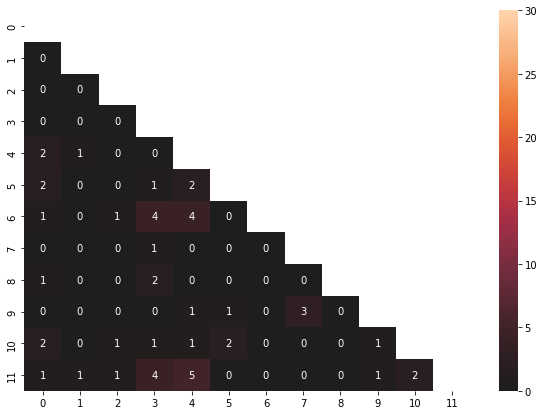

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')


X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=1)

def print_metrics(labels, preds, average):
    print("Precision Score: {}".format(precision_score(labels, preds, average=average)))
    print("Recall Score: {}".format(recall_score(labels, preds, average=average)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average=average)))

estimator_KNN = KNeighborsClassifier()
parameters_KNN = {
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan'],
    'n_neighbors':list(range(1,30))
}
                   
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5,
    refit=True
)

cv = KFold(n_splits=10, shuffle=False)
idx = 1
best_accuracy = 0.00000
best_grid_search = None
for train_index, test_index in cv.split(X_train):
    X_train_kfold = X_train.iloc[train_index]
    y_train_kfold = y_train.iloc[train_index]
    X_test_kfold = X_train.iloc[test_index]
    y_test_kfold = y_train.iloc[test_index]
    
    knn_1 = grid_search_KNN.fit(X_train_kfold, y_train_kfold.values.ravel())
    y_pred = knn_1.predict(X_test_kfold)
    
#     simpleknn=KNeighborsClassifier(n_neighbors=20)
#     simpleknn.fit(X_train_kfold,y_train_kfold)
#     model_assess(simpleknn)
#     y_pred = simpleknn.predict(X_test_kfold)
    
    if accuracy_score(y_test_kfold, y_pred) >= best_accuracy:
        best_accuracy = accuracy_score(y_test_kfold, y_pred)
        best_grid_search = knn_1
    
    print("This is for ith KFold -> ", idx)
    print_metrics(y_pred, y_test_kfold, 'macro')
    print()
    idx += 1

print("This is for best KFold testing on test set")
print()
print_metrics(best_grid_search.predict(X_test), y_test, 'macro')
model_assess(best_grid_search.best_estimator_, "Best_KNN")

fileName="KNN_best.pkl"
pickle.dump(best_grid_search,open(fileName, "wb"))

In [ ]:
print(best_grid_search.best_estimator_)
prediction_dataset

KNeighborsClassifier(metric='euclidean', n_neighbors=21, weights='distance')


0         1         2         3         4         5         6  \
0    -0.267387 -0.818539 -0.051547 -0.026872  1.031259 -0.649239 -0.349874   
1     1.407389 -0.754377 -0.070512  1.294197 -0.302668  0.239649  0.025203   
2     0.409811  0.072746 -0.194624 -0.099055 -0.800594  0.329974  1.026117   
3    -1.020654 -0.249993 -0.260543 -0.354703  0.649609 -0.017115 -0.914906   
4    -0.190318  0.163838  0.482817  0.686963  0.930512 -0.626596 -1.100300   
...        ...       ...       ...       ...       ...       ...       ...   
1195 -0.699243  1.292225  0.484354 -1.578406 -0.987886 -2.984876  1.010033   
1196  0.368099  0.531372 -0.451070  0.134107  0.150171 -1.309235  1.113682   
1197  0.262148 -0.502818 -0.038847  0.007139 -0.050988  0.332963  1.235831   
1198  0.365501 -0.825729 -0.161312  0.790068  0.669339  0.167753 -1.380487   
1199  0.057464 -0.983952  0.129279 -0.635158 -0.444129  0.296918  1.290061   

             7         8         9  ...        17        18        19  \
0    -1.094597  0.362263  0.685880  ...  0.071149  2.350974  1.066940   
1    -0.797751 -0.415749 -0.554614  ... -0.181019 -0.967322  0.149672   
2    -0.999417  0.308699 -0.520895  ... -0.882556  0.352194  0.509567   
3     0.887734 -0.073489 -2.450941  ...  1.544340 -0.879929  0.568380   
4    -1.553615 -1.272447 -1.229235  ...  0.571229 -1.241116 -1.219749   
...        ...       ...       ...  ...       ...       ...       ...   
1195  1.205310 -0.590638 -0.083417  ...  0.312977  1.250761 -0.393304   
1196 -0.059811 -0.571078  0.345016  ... -0.172969 -0.527882 -1.266962   
1197 -0.131782 -0.151925  0.051933  ... -0.848633 -1.140072 -0.440014   
1198  1.608013  0.969343  1.287839  ...  0.084533  0.886479 -1.257834   
1199  0.738282  1.456719  1.270797  ... -0.445260  0.152949 -0.196884   

            20        21        22        23        24        file_name  genre  
0     0.311916  0.023186  1.025699 -1.737286 -0.978741  blues.00000.wav  blues  
1    -0.122150  2.050911  1.633709  0.858953  0.013014  blues.00001.wav  blues  
2    -0.042883  0.151607  0.935409 -0.166659  0.208958  blues.00002.wav  blues  
3     0.887628 -0.973524 -1.083359 -1.381627 -0.430514  blues.00003.wav  blues  
4    -0.147303  0.020664  3.613037  1.467965 -0.693001  blues.00004.wav  blues  
...        ...       ...       ...       ...       ...              ...    ...  
1195 -2.329191  0.117472  0.230220 -1.101472  0.671886   rock.00095.wav   rock  
1196  0.922645  0.164162 -0.060659  0.037247  0.408919   rock.00096.wav   rock  
1197  1.130901  1.433958  0.361290  0.118428  0.374781   rock.00097.wav   rock  
1198  0.147305 -1.687951 -0.854534 -0.162258 -0.707513   rock.00098.wav   rock  
1199 -0.348599  2.381732  0.539639 -1.321612 -1.876336   rock.00099.wav   rock  

[1200 rows x 27 columns]

In [ ]:
def recommend_songs(song = "", n_recs = 5):
    # Identify selected song:
#     selected_song = df_names.loc[df_names['filename'] == song, ['Artist', 'Title', 'genre']]
    
    # Print song title and artist:
    print('If you like\n', song)
    
    print('\n You might enjoy the following songs:\n')
    
    # Find similar songs by implementing KNN - 
    # an additional neighbor is used, as the first result is the selected song itself:
    knn = KNeighborsClassifier(metric='euclidean', n_neighbors=21, weights='distance')
    fileName="KNN_recommendation_model.pkl"
    pickle.dump(best_grid_search,open(fileName, "wb"))
    
    knn.fit(X_train,y_train.values.ravel())
    
    get_song_data = prediction_dataset.loc[prediction_dataset['file_name'] == song]
    get_song_data = get_song_data.loc[:,get_song_data.columns != 'file_name']
    get_song_data = get_song_data.loc[:,get_song_data.columns != 'genre']
    distances, indices = knn.kneighbors(get_song_data,n_neighbors = n_recs + 1) 
    
#     print(indices, distances)
    
    # Generate recommendations list, and print song titles and artists:
    indices_fix = X_train.iloc[indices[0]].index
    filename = prediction_dataset.iloc[indices_fix]['file_name'].values.ravel()
    genres = prediction_dataset.iloc[indices_fix]['genre'].values.ravel()
    for i in range(0, len(filename)):
        print((i+1), genres[i], " --> \t", filename[i], "\t with a distance of \t", distances[0][i])
    return

recommend_songs('blues.00002.wav')

If you like
 blues.00002.wav

 You might enjoy the following songs:

1 blues  --> 	 blues.00002.wav 	 with a distance of 	 5.960464477539063e-08
2 metal  --> 	 metal.00099.wav 	 with a distance of 	 2.81903590591602
3 Electric-Genre  --> 	 air-richard-smithson-main-version-02-56-2602.wav 	 with a distance of 	 3.0430978695320055
4 classical  --> 	 classical.00027.wav 	 with a distance of 	 3.0698796778071227
5 jazz  --> 	 jazz.00000.wav 	 with a distance of 	 3.0871551132150836
6 reggae  --> 	 reggae.00014.wav 	 with a distance of 	 3.0951139657899462


Maximum accuracy:- 0.675 at K = 33


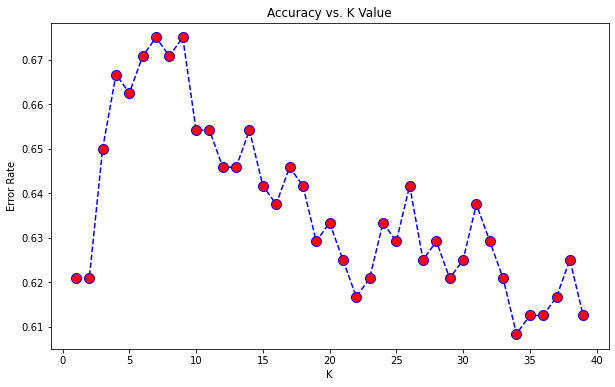

In [ ]:
error_rate = []

# encoder = LabelEncoder()
# encoder.fit(y.values.ravel())
# encoded_Y = encoder.fit_transform(y.values.ravel())
# y_new = to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=1)

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights='distance')
    knn.fit(X_train,y_train.values.ravel())
    pred_i = knn.predict(X_test)
    error_rate.append(accuracy_score(pred_i, y_test.values.ravel()))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('KnnVsK_Accuracy.png', dpi=400)
print("Maximum accuracy:-",max(error_rate),"at K =",error_rate.index(min(error_rate)))

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

cv = KFold(n_splits=10, shuffle=False)
idx = 1
best_accuracy = 0.00000
best_grid_search = None
for train_index, test_index in cv.split(X_train):
    
    X_train_kfold = X_train.iloc[train_index]
    y_train_kfold = y_train.iloc[train_index]
    X_test_kfold = X_train.iloc[test_index]
    y_test_kfold = y_train.iloc[test_index]

    logistic = LogisticRegression(max_iter = 10000, solver = "saga", multi_class = "multinomial")
    logistic.fit(X_train_kfold, y_train_kfold.values.ravel())
    test_score = logistic.score(X_test_kfold, y_test_kfold.values.ravel())

    y_pred = logistic.predict(X_test_kfold)
    print_metrics(y_pred, y_test_kfold, 'weighted')
    print()
    
    if accuracy_score(y_test_kfold, y_pred) >= best_accuracy:
        best_accuracy = accuracy_score(y_test_kfold, y_pred)
        best_grid_search = logistic
    
print("This is for best KFold testing on test set")
print()
print_metrics(best_grid_search.predict(X_test), y_test, 'weighted')

print(classification_report(best_grid_search.predict(X_test), y_test.values.ravel()))

fileName="Logistic_best.pkl"
pickle.dump(best_grid_search,open(fileName, "wb"))

Precision Score: 0.7294890873015873
Recall Score: 0.7083333333333334
Accuracy Score: 0.7083333333333334
F1 Score: 0.7080283112355481

Precision Score: 0.7073705808080808
Recall Score: 0.65625
Accuracy Score: 0.65625
F1 Score: 0.667698273948274

Precision Score: 0.6677827380952381
Recall Score: 0.625
Accuracy Score: 0.625
F1 Score: 0.6339510033095559

Precision Score: 0.6157072094572095
Recall Score: 0.5625
Accuracy Score: 0.5625
F1 Score: 0.5593059667048638

Precision Score: 0.6983180014430014
Recall Score: 0.6770833333333334
Accuracy Score: 0.6770833333333334
F1 Score: 0.6682300155984366

Precision Score: 0.684869123931624
Recall Score: 0.6666666666666666
Accuracy Score: 0.6666666666666666
F1 Score: 0.6579043043729577

Precision Score: 0.7672867063492063
Recall Score: 0.7083333333333334
Accuracy Score: 0.7083333333333334
F1 Score: 0.7181118705218604

Precision Score: 0.7202635327635328
Recall Score: 0.6979166666666666
Accuracy Score: 0.6979166666666666
F1 Score: 0.6993619157022292

Pr

# TSNE for visualization

In [ ]:
from sklearn.manifold import TSNE

y_train_pred = knn_1.predict(X)

# t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space
tsne=TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1)
data=tsne.fit_transform(scaled_df)

data=pd.DataFrame(data,columns=['dimension1','dimension2'])
data['label']=y_train_pred
data

sns.lmplot(x='dimension1', y='dimension2', data=data, hue='label', fit_reg=False,height=10,aspect=1.5)
plt.savefig('tsne_before_applying_model.png', dpi=400)

In [ ]:
cross_val_df = pd.DataFrame(grid_search_KNN.cv_results_)
cross_val_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.006999  8.869684e-07         0.024601        0.001747   
1       0.006397  1.960470e-03         0.015998        0.000894   
2       0.004798  9.816361e-04         0.244800        0.012578   
3       0.004399  1.497657e-03         0.233201        0.023015   
4       0.005196  1.169266e-03         0.028407        0.012303   

  param_algorithm param_leaf_size param_metric param_n_neighbors param_p  \
0            auto               1    minkowski                 1       1   
1            auto               1    minkowski                 1       1   
2            auto               1    minkowski                 1      10   
3            auto               1    minkowski                 1      10   
4            auto               1    minkowski                 1       1   

  param_weights                                             params  \
0       uniform  {'algorithm': 'auto', 'leaf_size': 1, 'metric'...   
1      distance  {'algorithm': 'auto', 'leaf_size': 1, 'metric'...   
2       uniform  {'algorithm': 'auto', 'leaf_size': 1, 'metric'...   
3      distance  {'algorithm': 'auto', 'leaf_size': 1, 'metric'...   
4       uniform  {'algorithm': 'auto', 'leaf_size': 1, 'metric'...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.604167           0.567708           0.593750           0.557292   
1           0.604167           0.567708           0.593750           0.557292   
2           0.557292           0.505208           0.541667           0.526042   
3           0.557292           0.505208           0.541667           0.526042   
4           0.604167           0.567708           0.593750           0.557292   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.625000         0.589583        0.024518              297  
1           0.625000         0.589583        0.024518              297  
2           0.536458         0.533333        0.017305              577  
3           0.536458         0.533333        0.017305              577  
4           0.625000         0.589583        0.024518              297

In [ ]:
from sklearn.metrics import classification_report

def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train.values.ravel())
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average='micro')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
    return k, best_score
    
def print_metrics(labels, preds, weights):
    print("Precision Score: {}".format(precision_score(labels, preds, average=weights)))
    print("Recall Score: {}".format(recall_score(labels, preds, average=weights)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average=weights)))
    
k, score = find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train.values.ravel())
preds = knn.predict(X_test)
    
print_metrics(y_test, preds, 'micro')

Best Value for k: 5
F1-Score: 0.6458333333333334
Precision Score: 0.5958333333333333
Recall Score: 0.5958333333333333
Accuracy Score: 0.5958333333333333
F1 Score: 0.5958333333333333


# Applying SVM model with KFold and GridSearch

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def listToString(s): 
    str1 = "" 
    for ele in s: 
        str1 += str(np.round(ele, 3))
        str1 += ", "
    return str1 

X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=1)

kfold=KFold(n_splits=5, shuffle=True, random_state=0)
model = SVC()
scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold)

model.fit(X_train, y_train.values.ravel())

predictions = model.predict(X_test)
print("After applying Kfold, the accuracies of the model was observed to be - ", listToString(scores))


print()
print("Now grid search is being applied to predict the best hyperparameters for prediction")
param_grid = [{'C':[1, 10, 100, 1000], 'kernel':['linear']},
                {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.01, 0.1, 1, 10, 0.5, 0.06, 0.7, 0.08, 0.9]},
                {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01, 0.03, 0.05, 0.1, 1]} 
            ] 
grid = GridSearchCV(SVC(), param_grid, scoring = 'accuracy', cv = 5, refit = True, verbose = 3)
grid.fit(X_train, y_train.values.ravel())


print()
print("The following were found to be the best parameter for SVC model")
print(grid.best_params_)
print(grid.best_estimator_)

print()
print()
print("Now showing you the report of the classwise accuracy, there recall score, f1 scores etc :-")
print()
print(classification_report(y_test.values.ravel(), predictions))

fileName="SVM_base.pkl"
pickle.dump(model,open(fileName, "wb"))

fileName="SVM_best.pkl"
pickle.dump(grid,open(fileName, "wb"))

After applying Kfold, the accuracies of the model was observed to be -  0.708, 0.672, 0.635, 0.698, 0.672, 

Now grid search is being applied to predict the best hyperparameters for prediction
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ................C=1, kernel=linear;, score=0.677 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.641 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.677 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.682 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.651 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.698 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear;, score=0.677 total time=   0.0s
[CV 3/5] END ...............C=10, kernel=linear;, score=0.635 total time=   0.0s
[CV 4/5] END ...............C=10, kernel=linear;, score=0.708 total time=   0.0s
[CV 5/5] END ..

[CV 5/5] END .......C=10, gamma=0.7, kernel=rbf;, score=0.141 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.08, kernel=rbf;, score=0.703 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.08, kernel=rbf;, score=0.641 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.08, kernel=rbf;, score=0.677 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.08, kernel=rbf;, score=0.688 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.08, kernel=rbf;, score=0.729 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.9, kernel=rbf;, score=0.161 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.9, kernel=rbf;, score=0.141 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.9, kernel=rbf;, score=0.156 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.9, kernel=rbf;, score=0.161 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.9, kernel=rbf;, score=0.115 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END .....C=100, gam

[CV 3/5] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.177 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.214 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.01, kernel=poly;, score=0.328 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.03, kernel=poly;, score=0.458 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.03, kernel=poly;, score=0.469 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.03, kernel=poly;, score=0.495 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.03, kernel=poly;, score=0.510 total time=   0.0s
[CV 5/5] END C=1, degree=2, gamma=0.03, kernel=poly;, score=0.526 total time=   0.0s
[CV 1/5] END C=1, degree=2, gamma=0.05, kernel=poly;, score=0.557 total time=   0.0s
[CV 2/5] END C=1, degree=2, gamma=0.05, kernel=poly;, score=0.594 total time=   0.0s
[CV 3/5] END C=1, degree=2, gamma=0.05, kernel=poly;, score=0.562 total time=   0.0s
[CV 4/5] END C=1, degree=2, gamma=0.05, kernel=poly;, score=0.604

[CV 2/5] END C=10, degree=3, gamma=0.01, kernel=poly;, score=0.208 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.01, kernel=poly;, score=0.229 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.01, kernel=poly;, score=0.224 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.01, kernel=poly;, score=0.234 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.03, kernel=poly;, score=0.615 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.03, kernel=poly;, score=0.562 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.03, kernel=poly;, score=0.573 total time=   0.0s
[CV 4/5] END C=10, degree=3, gamma=0.03, kernel=poly;, score=0.589 total time=   0.0s
[CV 5/5] END C=10, degree=3, gamma=0.03, kernel=poly;, score=0.688 total time=   0.0s
[CV 1/5] END C=10, degree=3, gamma=0.05, kernel=poly;, score=0.656 total time=   0.0s
[CV 2/5] END C=10, degree=3, gamma=0.05, kernel=poly;, score=0.599 total time=   0.0s
[CV 3/5] END C=10, degree=3, gamma=0.05, kernel=poly;,

[CV 1/5] END C=100, degree=4, gamma=0.01, kernel=poly;, score=0.266 total time=   0.0s
[CV 2/5] END C=100, degree=4, gamma=0.01, kernel=poly;, score=0.219 total time=   0.0s
[CV 3/5] END C=100, degree=4, gamma=0.01, kernel=poly;, score=0.240 total time=   0.0s
[CV 4/5] END C=100, degree=4, gamma=0.01, kernel=poly;, score=0.234 total time=   0.0s
[CV 5/5] END C=100, degree=4, gamma=0.01, kernel=poly;, score=0.234 total time=   0.0s
[CV 1/5] END C=100, degree=4, gamma=0.03, kernel=poly;, score=0.536 total time=   0.0s
[CV 2/5] END C=100, degree=4, gamma=0.03, kernel=poly;, score=0.495 total time=   0.0s
[CV 3/5] END C=100, degree=4, gamma=0.03, kernel=poly;, score=0.474 total time=   0.0s
[CV 4/5] END C=100, degree=4, gamma=0.03, kernel=poly;, score=0.479 total time=   0.0s
[CV 5/5] END C=100, degree=4, gamma=0.03, kernel=poly;, score=0.536 total time=   0.0s
[CV 1/5] END C=100, degree=4, gamma=0.05, kernel=poly;, score=0.479 total time=   0.0s
[CV 2/5] END C=100, degree=4, gamma=0.05, k

[CV 1/5] END C=1000, degree=4, gamma=1, kernel=poly;, score=0.479 total time=   0.0s
[CV 2/5] END C=1000, degree=4, gamma=1, kernel=poly;, score=0.495 total time=   0.0s
[CV 3/5] END C=1000, degree=4, gamma=1, kernel=poly;, score=0.458 total time=   0.0s
[CV 4/5] END C=1000, degree=4, gamma=1, kernel=poly;, score=0.505 total time=   0.0s
[CV 5/5] END C=1000, degree=4, gamma=1, kernel=poly;, score=0.510 total time=   0.0s

The following were found to be the best parameter for SVC model
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


Now showing you the report of the classwise accuracy, there recall score, f1 scores etc :-

                precision    recall  f1-score   support

Electric-Genre       0.71      0.94      0.81        16
         blues       0.81      0.89      0.85        19
     classical       0.95      0.95      0.95        20
       country       0.55      0.55      0.55        20
         disco       0.70      0.73      0.71        22
        hiphop 

# Implementing ANN

In [ ]:
def plot_loss(history, title, activation = "relu"):
    iter_arr = np.arange(1,len(history["loss"])+1)
    plt.plot(iter_arr, history["loss"], 'b', label = "training")
    plt.plot(iter_arr, history["val_loss"], 'g', label = "testing")
    plt.ylabel("Loss")
    plt.title(str(activation) + " loss")
    plt.legend()
    plt.rcParams["figure.figsize"] = (8,6)
    plt.show()
    plt.savefig(title + '.png', dpi=400)

def plot_accuracy(history, title, activation = "relu"):
    iter_arr = np.arange(1,len(history["accuracy"])+1)
    plt.plot(iter_arr, history["accuracy"], 'b', label = "training")
    plt.plot(iter_arr, history["val_accuracy"], 'g', label = "testing")
    plt.ylabel("Accuracy")
    plt.title(str(activation) + " accuracy")
    plt.legend()
    # plt.rcParams["figure.figsize"] = (8,6)
    plt.show()
    plt.savefig(title + '.png', dpi=400)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
import np_utils
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, BatchNormalization
from keras.layers import Input, Embedding, Dot, Reshape, Dense
from keras.models import Model
import numpy as np
from sklearn import preprocessing
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

df = pd.read_csv (r'rms_mel.csv')
df = shuffle(df)


X_music_file = df.loc[:, df.columns != "genre"]
X = X_music_file.loc[:, X_music_file.columns != "file_name"]
y = df.loc[:, df.columns == "genre"]

encoder = LabelEncoder()
encoder.fit(y.values.ravel())
encoded_Y = encoder.fit_transform(y.values.ravel())
y_new = to_categorical(encoded_Y)
scaler = StandardScaler()
X_new = scaler.fit_transform(X)
# X = preprocessing.normalize(X)
scaled_df = pd.DataFrame(X_new)

X_train, X_test, y_train, y_test = train_test_split(scaled_df, encoded_Y, test_size=0.2, random_state=1)



data_accuracy = []
data_precision = []
data_recall = []
data_f1score = []
data_accuracy_train_data = []
y_predict = []


class Metrics(Callback):
    
    def __init__(self, val_data, batch_size, epochs,train_x ,train_y ):
        super().__init__()
        self.train_x = train_x
        self.train_y = train_y
        self.validation_data = val_data
        self.batch_size = batch_size

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        val_predict = self.model.predict(self.validation_data[0])
        val_predict = np.argmax(val_predict,axis=1)
        val_targ = self.validation_data[1]
        
        train_predict = self.model.predict(self.train_x)
        train_predict = np.argmax(train_predict,axis=1)
        train_target = self.train_y
        _accuracy_score = accuracy_score(val_targ, val_predict)
        _val_f1 = f1_score(val_targ, val_predict, average='micro')
        _val_recall = recall_score(val_targ, val_predict, average='macro')
        _val_precision = precision_score(val_targ, val_predict, average='macro')
        y_predict.append(val_predict)
        
        train_accuracy_score = accuracy_score(train_target, train_predict)
        
        data_accuracy.append(_accuracy_score)
        data_precision.append(_val_precision)
        data_recall.append(_val_recall)
        data_f1score.append(_val_f1)
        data_accuracy_train_data.append(train_accuracy_score)
        
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
#         print(f" — val_f1: {_val_f1} — val_precision: {_val_precision} — val_recall: {_val_recall}")
        return

def implements(x,y,xt,yt,activation_h = "sigmoid", activation_o = "softmax",n_hidden = 2, n_neurons = [256, 128], learning_rate = 0.001, epochs = 100, batch_size = 32, regularize = True, alpha = 0.0001, dropout = True, dropout_prob = 0.3):
    
    metrics = Metrics([xt, yt], batch_size, epochs, x, y)
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_dim=41))
    for i in range(n_hidden):
        if regularize:
            model.add(keras.layers.Dense(n_neurons[i], activation=activation_h, kernel_regularizer=keras.regularizers.l1(0.00001), name='dense_'+str(i)))
        else:
            model.add(keras.layers.Dense(n_neurons[i], activation=activation_h, name='dense_'+str(i)))
        model.add(BatchNormalization(name = 'normalize_'+str(i)))
        if dropout:
            model.add(keras.layers.Dropout(0.20, name = 'dropout_'+str(i)))

    model.add(keras.layers.Dense(12, activation=activation_o, name = 'output'))
    optimiser = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x, y, validation_data=(xt, yt), batch_size=batch_size, epochs=epochs, callbacks=[metrics])
    return history, model

history, model = implements(X_train, y_train, X_test, y_test)
# print(y_predict)
training_accuracy = history.history["accuracy"]
testing_accuracy = history.history["val_accuracy"]


Epoch 1/100
30/30 [==============================] - 1s 19ms/step - loss: 1.8839 - accuracy: 0.4042 - val_loss: 2.5377 - val_accuracy: 0.2375
Epoch 2/100
25/30 [========================>.....] - ETA: 0s - loss: 1.3596 - accuracy: 0.5587

C:\Users\Jasdeep Singh\.conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30/30 [==============================] - 0s 8ms/step - loss: 1.3647 - accuracy: 0.5552 - val_loss: 2.3988 - val_accuracy: 0.2917
Epoch 3/100
26/30 [=========================>....] - ETA: 0s - loss: 1.2092 - accuracy: 0.6142

C:\Users\Jasdeep Singh\.conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30/30 [==============================] - 0s 8ms/step - loss: 1.1941 - accuracy: 0.6177 - val_loss: 2.2650 - val_accuracy: 0.2875
Epoch 4/100
22/30 [=====================>........] - ETA: 0s - loss: 1.0548 - accuracy: 0.6392

C:\Users\Jasdeep Singh\.conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30/30 [==============================] - 0s 8ms/step - loss: 1.1039 - accuracy: 0.6406 - val_loss: 2.1086 - val_accuracy: 0.3833
Epoch 5/100
25/30 [========================>.....] - ETA: 0s - loss: 1.0612 - accuracy: 0.6438

C:\Users\Jasdeep Singh\.conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30/30 [==============================] - 0s 8ms/step - loss: 1.0500 - accuracy: 0.6458 - val_loss: 1.9242 - val_accuracy: 0.5375
Epoch 6/100
25/30 [========================>.....] - ETA: 0s - loss: 1.0593 - accuracy: 0.6675

C:\Users\Jasdeep Singh\.conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30/30 [==============================] - 0s 8ms/step - loss: 1.0557 - accuracy: 0.6646 - val_loss: 1.7753 - val_accuracy: 0.5833
Epoch 7/100
30/30 [==============================] - 0s 8ms/step - loss: 0.9759 - accuracy: 0.6948 - val_loss: 1.6133 - val_accuracy: 0.6167
Epoch 8/100
30/30 [==============================] - 0s 8ms/step - loss: 0.9538 - accuracy: 0.6833 - val_loss: 1.4332 - val_accuracy: 0.6250
Epoch 9/100
30/30 [==============================] - 0s 8ms/step - loss: 0.9730 - accuracy: 0.6812 - val_loss: 1.2993 - val_accuracy: 0.7000
Epoch 10/100
30/30 [==============================] - 0s 8ms/step - loss: 0.9349 - accuracy: 0.7031 - val_loss: 1.1663 - val_accuracy: 0.6833
Epoch 11/100
30/30 [==============================] - 0s 9ms/step - loss: 0.9017 - accuracy: 0.7135 - val_loss: 1.0553 - val_accuracy: 0.7250
Epoch 12/100
30/30 [==============================] - 0s 8ms/step - loss: 0.8312 - accuracy: 0.7323 - val_loss: 0.9541 - val_accuracy: 0.7458
Epoch 13/100
30/30 [==

Epoch 64/100
30/30 [==============================] - 0s 9ms/step - loss: 0.4909 - accuracy: 0.8354 - val_loss: 0.6360 - val_accuracy: 0.7792
Epoch 65/100
30/30 [==============================] - 0s 8ms/step - loss: 0.4859 - accuracy: 0.8323 - val_loss: 0.6663 - val_accuracy: 0.7792
Epoch 66/100
30/30 [==============================] - 0s 8ms/step - loss: 0.4702 - accuracy: 0.8531 - val_loss: 0.6743 - val_accuracy: 0.7750
Epoch 67/100
30/30 [==============================] - 0s 8ms/step - loss: 0.4733 - accuracy: 0.8458 - val_loss: 0.7030 - val_accuracy: 0.7708
Epoch 68/100
30/30 [==============================] - 0s 8ms/step - loss: 0.4700 - accuracy: 0.8417 - val_loss: 0.6619 - val_accuracy: 0.7792
Epoch 69/100
30/30 [==============================] - 0s 8ms/step - loss: 0.4470 - accuracy: 0.8615 - val_loss: 0.6689 - val_accuracy: 0.7750
Epoch 70/100
30/30 [==============================] - 0s 8ms/step - loss: 0.4742 - accuracy: 0.8458 - val_loss: 0.6637 - val_accuracy: 0.7875
Epoch 

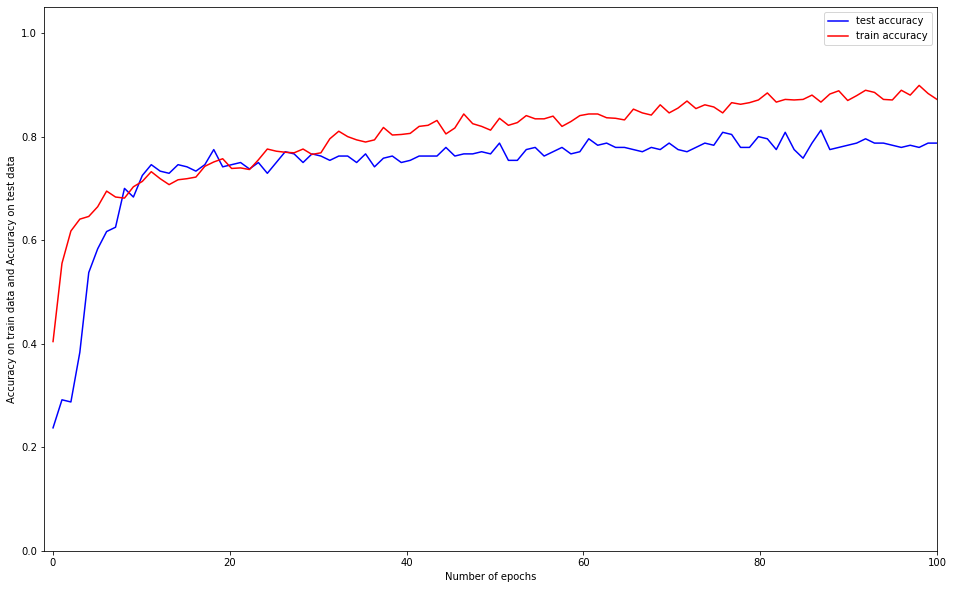

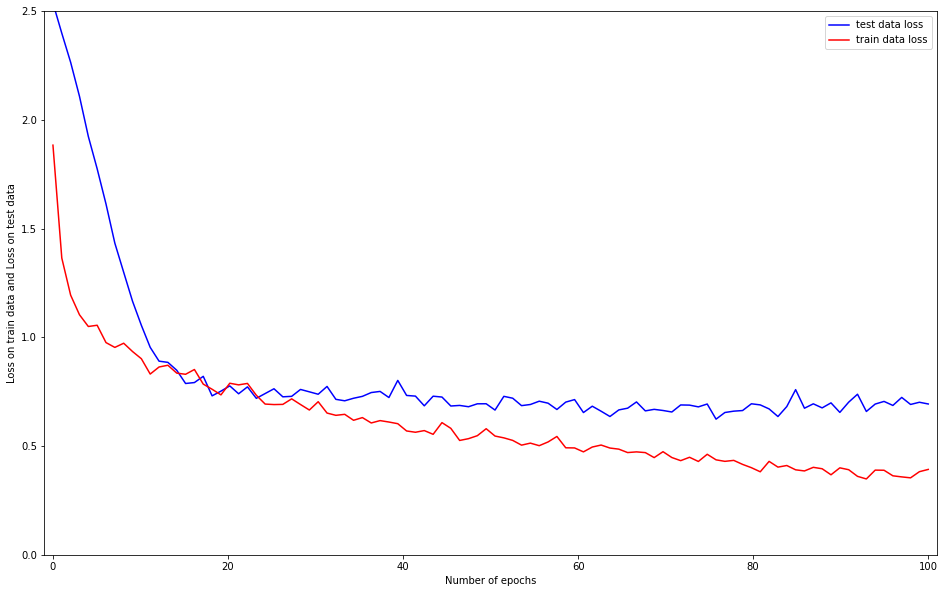

In [ ]:
x=np.linspace(0,100,100)
plt.figure(figsize=(16,10))
plt.plot(x, history.history["val_accuracy"], color='blue', label='test accuracy')    
plt.plot(x, history.history["accuracy"], color='red', label='train accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy on train data and Accuracy on test data')
plt.xlim(-1,100)
plt.ylim(0, 1.05)
plt.legend()
plt.savefig('ANN_TrainVsTest_accuracy.png', dpi=400)

x=np.linspace(0,100,100)
plt.figure(figsize=(16,10))
plt.plot(x, history.history["val_loss"], color='blue', label='test data loss')    
plt.plot(x, history.history["loss"], color='red', label='train data loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss on train data and Loss on test data')
plt.xlim(-1,101)
plt.ylim(0, 2.5)
plt.legend()
plt.savefig('ANN_TrainVsTest_loss.png', dpi=400)

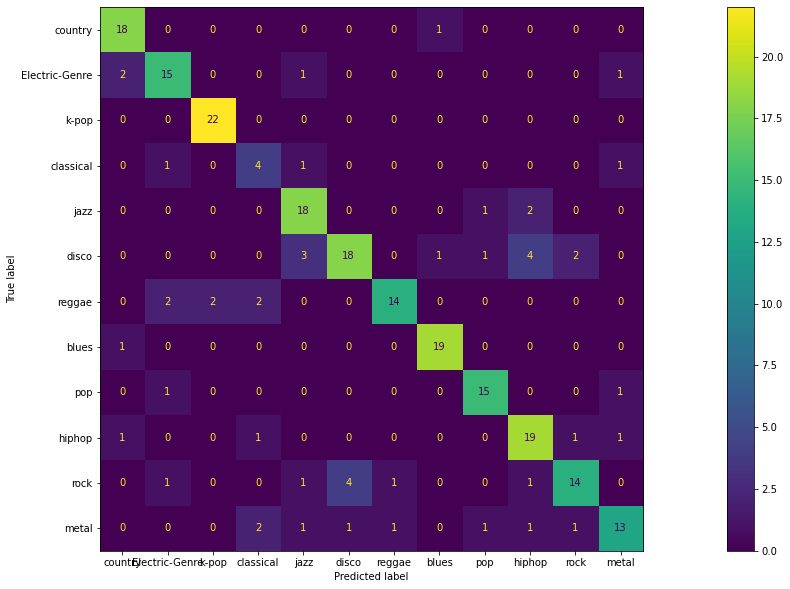

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = df['genre'].unique()
cm = confusion_matrix(y_test, y_predict[-1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(30,10))
disp.plot(ax=ax)
# disp.save("ANN_best_ConfusionMatrixPlot.png", dpi = 400)

# Making recommendation system using ANN - Embedding with similiarity

In [ ]:
import IPython.display as ipd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

# Here for embedding we are getting output from our layer
# This output will basically be be probabilities corresponding to 12 generes
# y_predict = model.predict(X)
# print(len(y_predict[0]))

# This is the probabilities corresponding to all genres that out model is predicting
model.summary()
fileName="ANN_best.pkl"
pickle.dump(model,open(fileName, "wb"))


intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('dense_1').output)
y_predict = intermediate_layer_model.predict(scaled_df)
# print(y_predict[0])


ann_dataframe = pd.DataFrame(y_predict)
ann_dataframe = ann_dataframe.set_index(X.index)
print(ann_dataframe.shape)
# model.pop()
# model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 41)                0         
                                                                 
 dense_0 (Dense)             (None, 256)               10752     
                                                                 
 normalize_0 (BatchNormaliza  (None, 256)              1024      
 tion)                                                           
                                                                 
 dropout_0 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 normalize_1 (BatchNormaliza  (None, 128)              512       
 tion)                                                

In [ ]:
similarity = cosine_similarity(ann_dataframe)
print("Similarity shape:", similarity.shape)

sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(X.index)
sim_df_names.columns = X.index
sim_df_names.head()

Similarity shape: (1200, 1200)


229       266       1066      692       2         278       520   \
229   1.000000  0.622411  0.681718  0.744706  0.612986  0.767802  0.418119   
266   0.622411  1.000000  0.741931  0.578057  0.867826  0.598452  0.686286   
1066  0.681718  0.741931  1.000000  0.533209  0.865682  0.685686  0.634774   
692   0.744706  0.578057  0.533209  1.000000  0.468568  0.704297  0.399872   
2     0.612986  0.867826  0.865682  0.468568  1.000000  0.588137  0.619322   

          931       730       560   ...      841       402       660   \
229   0.620068  0.609546  0.569562  ...  0.541824  0.443877  0.673809   
266   0.671436  0.576398  0.534530  ...  0.728979  0.524653  0.698149   
1066  0.503686  0.536645  0.767571  ...  0.651085  0.432878  0.677931   
692   0.709895  0.632103  0.493237  ...  0.548192  0.461227  0.693929   
2     0.549686  0.646214  0.589034  ...  0.616951  0.496426  0.688272   

          933       1159      451       726       745       295       761   
229   0.626564  0.650953  0.548532  0.591608  0.537670  0.733648  0.501248  
266   0.610619  0.405514  0.711781  0.417751  0.600305  0.805477  0.688772  
1066  0.567044  0.553199  0.637026  0.473182  0.471076  0.612918  0.514329  
692   0.697666  0.782022  0.527920  0.655298  0.553687  0.614600  0.547841  
2     0.513392  0.395882  0.663738  0.461692  0.592232  0.728326  0.647939  

[5 rows x 1200 columns]

In [ ]:
prediction_dataset = df

def find_similar_songs(name):
    series = sim_df_names[name].sort_values(ascending = False)
    indexes = series.head(10)
    return indexes
    

song = 'blues.00002.wav'
print("\n-----------------------------------------------------------------------\n\nSimilar songs to", song)
print()
get_song_data = prediction_dataset.loc[prediction_dataset['file_name'] == song]
song_idx = get_song_data.index[0]

indexes = find_similar_songs(song_idx)

indices_fix = indexes.index
filename = prediction_dataset.loc[indices_fix]['file_name'].values.ravel()
genres = prediction_dataset.loc[indices_fix]['genre'].values.ravel()
for i in range(0, len(filename)):
    print((i+1), genres[i], "  \t --> ", filename[i])
    print("\t\t", " Recommendation score =", indexes.loc[indices_fix[i]])
    print()

print("\n-----------------------------------------------------------------------\n")



-----------------------------------------------------------------------

Similar songs to blues.00002.wav

1 blues   	 -->  blues.00002.wav
		  Recommendation score = 0.9999998

2 rock   	 -->  rock.00009.wav
		  Recommendation score = 0.88283974

3 disco   	 -->  disco.00086.wav
		  Recommendation score = 0.87353134

4 country   	 -->  country.00072.wav
		  Recommendation score = 0.8699937

5 country   	 -->  country.00066.wav
		  Recommendation score = 0.8678256

6 blues   	 -->  blues.00080.wav
		  Recommendation score = 0.8677113

7 reggae   	 -->  reggae.00066.wav
		  Recommendation score = 0.86568165

8 blues   	 -->  blues.00010.wav
		  Recommendation score = 0.8656725

9 blues   	 -->  blues.00000.wav
		  Recommendation score = 0.86476517

10 rock   	 -->  rock.00064.wav
		  Recommendation score = 0.8637908


-----------------------------------------------------------------------



# Maximum was found to be of ANN and we have added made recommendation system for the same.